
# Data processing ane exploration for text data 
- The codes in this notebook are modified from various sources, including this [tutorial](http://www.data-analysis-in-python.org/t_text_analysis.html#), this [tutorial](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/), and this [tutorial](https://www.digitalvidya.com/blog/an-introduction-to-text-analysis-in-python/). 
- [This book](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/#toc-start) is also very helpful. 
- All codes are for educational purposes only and released under the MIT licence. 

# import the data 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reviews_of_Douban.csv')
df.head()

,������,����,����ʱ��,Commental title,Review main body,�޳���,������.1,�ظ���
0,___MONA,����,2021/9/19 15:40,"Space and symbol metaphor analysis of ""squid g...","(First, the public number: ___, welcome attent...",2549.0,120.0,477��Ӧ
1,��˹�ص�,����,2021/9/20 14:27,I hate those reasonable comments,The game design in this TV series is a morphol...,1158.0,149.0,254��Ӧ
2,��,����,2021/9/19 19:41,"I am gambling horses, I don't work, I am old b...",The Father is the father of all beings. I was ...,1008.0,123.0,553��Ӧ
3,����,��������,2021/9/19 23:42,"The man is not the Father, but fake, bad, not ...","After reading my biggest question, how can peo...",727.0,131.0,613��Ӧ
4,�� ��,����,2021/9/23 13:47,Kong Liu fan Li Zheng slaughtered the result o...,"I as an example, let's talk about the plot and...",350.0,34.0,67��Ӧ


In [5]:
df_reviews = pd.DataFrame(df['Review main body'], columns=['Review main body'])

In [6]:
df_reviews.head()

,Review main body
0,"(First, the public number: ___, welcome attent..."
1,The game design in this TV series is a morphol...
2,The Father is the father of all beings. I was ...
3,"After reading my biggest question, how can peo..."
4,"I as an example, let's talk about the plot and..."


# Mining the text

## Basic Feature Extraction

In [7]:
# number of characters per row

df_reviews['char_count'] = df_reviews['Review main body'].str.len()  ## this also includes spaces

df_reviews.head()

,Review main body,char_count
0,"(First, the public number: ___, welcome attent...",368
1,The game design in this TV series is a morphol...,408
2,The Father is the father of all beings. I was ...,453
3,"After reading my biggest question, how can peo...",435
4,"I as an example, let's talk about the plot and...",452


In [8]:
string = str(df_reviews)
print(string.split())
len(string.split())

['Review', 'main', 'body', 'char_count', '0', '(First,', 'the', 'public', 'number:', '___,', 'welcome', 'attent...', '368', '1', 'The', 'game', 'design', 'in', 'this', 'TV', 'series', 'is', 'a', 'morphol...', '408', '2', 'The', 'Father', 'is', 'the', 'father', 'of', 'all', 'beings.', 'I', 'was', '...', '453', '3', 'After', 'reading', 'my', 'biggest', 'question,', 'how', 'can', 'peo...', '435', '4', 'I', 'as', 'an', 'example,', "let's", 'talk', 'about', 'the', 'plot', 'and...', '452', '...', '...', '...', '1115', '/', '1', '1116', 'Maybe', 'I', 'look', 'forward', 'to', 'it', 'too', 'much', 'for', 'this', 'd...', '388', '1117', 'The', 'plot', 'is', 'dragged,', 'several', 'lenses', 'against', 'th...', '417', '1118', 'SquidGame', 'Squid', 'Game', 'Director', 'Hwangdong-Hyuk', 's...', '446', '1119', 'About', 'the', 'male', 'protagonist:', 'I', "didn't", 'expect', 'th...', '433', '[1120', 'rows', 'x', '2', 'columns]']


112

In [9]:
# define an embedded function to find the number of words per row

df_reviews['word_count'] = df_reviews['Review main body'].apply(
    lambda ttl: len(str(ttl).split()))
df_reviews.head()

,Review main body,char_count,word_count
0,"(First, the public number: ___, welcome attent...",368,56
1,The game design in this TV series is a morphol...,408,76
2,The Father is the father of all beings. I was ...,453,84
3,"After reading my biggest question, how can peo...",435,79
4,"I as an example, let's talk about the plot and...",452,83


## Basic text processing
- this step is normally called text normalization 

In [10]:
# removing the empty values

df_reviews['Review main body'] = df_reviews['Review main body'].fillna("")

In [11]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_reviews['Review main body'] = df_reviews['Review main body'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_reviews['Review main body'].head()

0    (first, the public number: ___, welcome attent...
1    the game design in this tv series is a morphol...
2    the father is the father of all beings. i was ...
3    after reading my biggest question, how can peo...
4    i as an example, let's talk about the plot and...
Name: Review main body, dtype: object

In [12]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_reviews['Review main body'] = df_reviews['Review main body'].str.replace('[^\w\s]', '')
df_reviews['Review main body'].head()

<ipython-input-12-1ca0aabd5208>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['Review main body'] = df_reviews['Review main body'].str.replace('[^\w\s]', '')


0    first the public number ___ welcome attention ...
1    the game design in this tv series is a morphol...
2    the father is the father of all beings i was o...
3    after reading my biggest question how can peop...
4    i as an example lets talk about the plot and t...
Name: Review main body, dtype: object

## Do come counting

In [13]:
!pip install nltk

In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takasugi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# import stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')
type(stop)

list

In [62]:
# extend stop words
new=['bit', 'think', 'something','episode','serie','nan','watch','dont','feel','thing','really','lot','many','netflix','even','see','made','much','keep','im'
,'every','nan nan','got','ive','u','___','_','__','may','2','know','squid','get','would','say','well','seen','that','yes','couldnt','go','didnt','everything','still','nothing','way','far','one','game']
stop.extend(new)


In [63]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
# removing stop words in sentence
df_reviews['Review main body']= df_reviews['Review main body'].apply(
    lambda ttl:  " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_reviews['Review main body'].head()

0    first public number welcome attention use cont...
1    design tv series morphological change real wor...
2    father father originally wow net flight korea ...
3    reading biggest question people man highlighte...
4    example let talk plot scenery drama handsome l...
Name: Review main body, dtype: object

In [65]:
string = ' '.join(df_reviews['Review main body'])
string

'first public number welcome attention use contrast form tension space metaphor chu gate world compare work murderous design pediatrics child play twothree wood people buckle cake tugofwar marble overwood bridge pediatric become horrible design tv series morphological change real world time everyone emphasizing people number people symbol people real people emphasizes fear become number africa corner passed river bite neck crocodile father father originally wow net flight korea play bottom line fight looking forward expectation little also necessary shoot second department male master ten year strike incident understand accept wisdom wife accompanied wife actually accompanying coma reading biggest question people man highlighter drama last socalled believe people nine statement point first male owner good participate although also matter feeding cat take character male compared man mother daughter practice root example let talk plot scenery drama handsome li zhija ouba fullend loser un

In [66]:
lst = string.split()
lst

['first',
 'public',
 'number',
 'welcome',
 'attention',
 'use',
 'contrast',
 'form',
 'tension',
 'space',
 'metaphor',
 'chu',
 'gate',
 'world',
 'compare',
 'work',
 'murderous',
 'design',
 'pediatrics',
 'child',
 'play',
 'twothree',
 'wood',
 'people',
 'buckle',
 'cake',
 'tugofwar',
 'marble',
 'overwood',
 'bridge',
 'pediatric',
 'become',
 'horrible',
 'design',
 'tv',
 'series',
 'morphological',
 'change',
 'real',
 'world',
 'time',
 'everyone',
 'emphasizing',
 'people',
 'number',
 'people',
 'symbol',
 'people',
 'real',
 'people',
 'emphasizes',
 'fear',
 'become',
 'number',
 'africa',
 'corner',
 'passed',
 'river',
 'bite',
 'neck',
 'crocodile',
 'father',
 'father',
 'originally',
 'wow',
 'net',
 'flight',
 'korea',
 'play',
 'bottom',
 'line',
 'fight',
 'looking',
 'forward',
 'expectation',
 'little',
 'also',
 'necessary',
 'shoot',
 'second',
 'department',
 'male',
 'master',
 'ten',
 'year',
 'strike',
 'incident',
 'understand',
 'accept',
 'wisdom',

In [67]:
srs = pd.Series(lst)
srs

0            first
1           public
2           number
3          welcome
4        attention
           ...    
21661         also
21662      biggest
21663      problem
21664        drama
21665        theme
Length: 21666, dtype: object

In [68]:
srs.value_counts()

people          477
drama           347
first           208
also            176
good            168
               ... 
appreciation      1
qin               1
beneficial        1
sensible          1
banking           1
Length: 4233, dtype: int64

In [69]:
freq_common = srs.value_counts()[:10]
freq_common

people    477
drama     347
first     208
also      176
good      168
man       168
male      156
korean    131
big       124
like      123
dtype: int64

In [70]:
freq_common = srs.value_counts()[-10:]
freq_common

__interested    1
respectively    1
farmer          1
decade          1
fearful         1
appreciation    1
qin             1
beneficial      1
sensible        1
banking         1
dtype: int64

In [71]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

df_reviews['Review main body']= df_reviews['Review main body'].apply(remove_non_ascii)

df_reviews['Review main body']

0       first public number welcome attention use cont...
1       design tv series morphological change real wor...
2       father father originally wow net flight korea ...
3       reading biggest question people man highlighte...
4       example let talk plot scenery drama handsome l...
                              ...                        
1115                                                     
1116    maybe look forward drama like drama type theme...
1117    plot dragged several lens antiswift logic self...
1118    squidgame director hwangdonghyuk story introdu...
1119    male protagonist expect someone move directly ...
Name: Review main body, Length: 1120, dtype: object

In [72]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
df_reviews['Review main body'].apply(
    lambda ttl: " ".join([st.stem(wrd) for wrd in ttl.split()]))

0       first public number welcom attent use contrast...
1       design tv seri morpholog chang real world time...
2       father father origin wow net flight korea play...
3       read biggest question peopl man highlight dram...
4       exampl let talk plot sceneri drama handsom li ...
                              ...                        
1115                                                     
1116    mayb look forward drama like drama type theme ...
1117    plot drag sever len antiswift logic selfcontai...
1118    squidgam director hwangdonghyuk stori introduc...
1119    male protagonist expect someon move directli w...
Name: Review main body, Length: 1120, dtype: object

In [73]:
# Lemmatization
from textblob import Word

df_reviews['Review main body'] =df_reviews['Review main body'].apply(
    lambda ttl: " ".join([Word(wrd).lemmatize() for wrd in ttl.split()]))
df_reviews['Review main body']

0       first public number welcome attention use cont...
1       design tv series morphological change real wor...
2       father father originally wow net flight korea ...
3       reading biggest question people man highlighte...
4       example let talk plot scenery drama handsome l...
                              ...                        
1115                                                     
1116    maybe look forward drama like drama type theme...
1117    plot dragged several lens antiswift logic self...
1118    squidgame director hwangdonghyuk story introdu...
1119    male protagonist expect someone move directly ...
Name: Review main body, Length: 1120, dtype: object

In [74]:
import numpy as np

df_reviews['Review main body'] =df_reviews['Review main body'].str.replace('\d+', '')
df_reviews['Review main body'].replace(' ', np.nan, inplace=True)
df_reviews['Review main body']

<ipython-input-74-ed025522d83b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['Review main body'] =df_reviews['Review main body'].str.replace('\d+', '')


0       first public number welcome attention use cont...
1       design tv series morphological change real wor...
2       father father originally wow net flight korea ...
3       reading biggest question people man highlighte...
4       example let talk plot scenery drama handsome l...
                              ...                        
1115                                                     
1116    maybe look forward drama like drama type theme...
1117    plot dragged several lens antiswift logic self...
1118    squidgame director hwangdonghyuk story introdu...
1119    male protagonist expect someone move directly ...
Name: Review main body, Length: 1120, dtype: object

In [75]:
!pip install matplotlib
!pip install wordcloud

In [76]:
from textblob import TextBlob

TextBlob(df_reviews['Review main body'] [19]).words

WordList(['suspense', 'left', 'police', 'brother', 'seeing', 'list', 'certain', 'entrant', 'become', 'host', 'police', 'die', 'also', 'fan', 'fan', 'fan', 'btw', 'want', 'man', 'end', 'decided', 'second', 'bureau', 'deceive', 'old', 'man', 'also', 'indirectly', 'killing', 'although', 'last', 'last', 'good'])

In [77]:
TextBlob(df_reviews['Review main body'] [3]).ngrams(2)

[WordList(['reading', 'biggest']),
 WordList(['biggest', 'question']),
 WordList(['question', 'people']),
 WordList(['people', 'man']),
 WordList(['man', 'highlighter']),
 WordList(['highlighter', 'drama']),
 WordList(['drama', 'last']),
 WordList(['last', 'socalled']),
 WordList(['socalled', 'believe']),
 WordList(['believe', 'people']),
 WordList(['people', 'nine']),
 WordList(['nine', 'statement']),
 WordList(['statement', 'point']),
 WordList(['point', 'first']),
 WordList(['first', 'male']),
 WordList(['male', 'owner']),
 WordList(['owner', 'good']),
 WordList(['good', 'participate']),
 WordList(['participate', 'although']),
 WordList(['although', 'also']),
 WordList(['also', 'matter']),
 WordList(['matter', 'feeding']),
 WordList(['feeding', 'cat']),
 WordList(['cat', 'take']),
 WordList(['take', 'character']),
 WordList(['character', 'male']),
 WordList(['male', 'compared']),
 WordList(['compared', 'man']),
 WordList(['man', 'mother']),
 WordList(['mother', 'daughter']),
 WordLi

In [78]:
TextBlob(df_reviews['Review main body'] [7]).ngrams(3)

[WordList(['discussing', 'seem', 'known']),
 WordList(['seem', 'known', 'yen']),
 WordList(['known', 'yen', 'star']),
 WordList(['yen', 'star', 'star']),
 WordList(['star', 'star', 'work']),
 WordList(['star', 'work', 'softly']),
 WordList(['work', 'softly', 'drama']),
 WordList(['softly', 'drama', 'heart']),
 WordList(['drama', 'heart', 'want']),
 WordList(['heart', 'want', 'express']),
 WordList(['want', 'express', 'learn']),
 WordList(['express', 'learn', 'bridge']),
 WordList(['learn', 'bridge', 'hunger']),
 WordList(['bridge', 'hunger', 'big']),
 WordList(['hunger', 'big', 'escape']),
 WordList(['big', 'escape', 'moving']),
 WordList(['escape', 'moving', 'maze']),
 WordList(['moving', 'maze', 'story']),
 WordList(['maze', 'story', 'drag']),
 WordList(['story', 'drag', 'fact']),
 WordList(['drag', 'fact', 'reduced']),
 WordList(['fact', 'reduced', 'director']),
 WordList(['reduced', 'director', 'talking']),
 WordList(['director', 'talking', 'human'])]

In [97]:
# TF
tf1 = df_reviews['Review main body'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
DOUBAN_内容_head_100=tf1.sort_values(['tf'], ascending=False).head(100)
DOUBAN_内容_head_100.to_csv('DOUBAN_内容_top_100.csv')
# DOUBAN_内容_head_100

In [60]:
fp=DOUBAN_内容_head_100
word = list(fp.words)#词
value = fp.tf#词的频率
for i in range(len(word)):
    word[i] = word[i]
dic = dict(zip(word, value))#词频以字典形式存储

In [61]:
dic

{'people': 477.0,
 '': 455.0,
 'drama': 347.0,
 'first': 208.0,
 'also': 176.0,
 'good': 168.0,
 'man': 168.0,
 'male': 156.0,
 'korean': 131.0,
 'big': 124.0,
 'like': 123.0,
 'life': 121.0,
 'old': 120.0,
 'want': 109.0,
 'two': 105.0,
 'time': 104.0,
 'money': 104.0,
 'person': 101.0,
 'film': 96.0,
 'last': 95.0,
 'human': 93.0,
 'play': 92.0,
 'plot': 92.0,
 'look': 84.0,
 'world': 80.0,
 'day': 79.0,
 'cant': 78.0,
 'reading': 77.0,
 'story': 73.0,
 'everyone': 71.0,
 'wood': 70.0,
 '__': 70.0,
 'point': 69.0,
 'protagonist': 66.0,
 'make': 66.0,
 'second': 65.0,
 'escape': 65.0,
 'gambling': 64.0,
 'let': 63.0,
 'give': 63.0,
 'death': 61.0,
 'humanity': 60.0,
 'take': 59.0,
 'simple': 58.0,
 'whole': 58.0,
 'kind': 58.0,
 'character': 57.0,
 'end': 57.0,
 'rule': 57.0,
 'korea': 57.0,
 'mother': 57.0,
 'saw': 54.0,
 'work': 54.0,
 'said': 53.0,
 'li': 53.0,
 'nature': 53.0,
 'child': 52.0,
 'although': 52.0,
 'director': 51.0,
 'full': 51.0,
 'year': 51.0,
 'police': 51.0,
 'gr

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Learn vocabulary and idf, return term-document matrix.
doc_term_scores = vectorizer.fit_transform(df_reviews['Review main body'])
print(vectorizer.get_feature_names())

['____', '_____', '________', '__________________', '______er', '____care', '__course', '__interested', '__jin', '__really', '__rnb', '__the', '_related', '_rnb_', '_the', '_vip____', '_worked', 'abalone', 'abandon', 'abandoning', 'abandonment', 'abbreviation', 'abide', 'ability', 'able', 'abrupt', 'absolute', 'absolutely', 'abstract', 'absurd', 'abuse', 'abused', 'abyss', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accident', 'accidental', 'accompanied', 'accompany', 'accompanying', 'accordance', 'according', 'account', 'accumulate', 'accumulated', 'accumulation', 'accuse', 'achieve', 'achieved', 'achievement', 'achilles', 'acquisition', 'act', 'acting', 'action', 'active', 'activity', 'actor', 'actress', 'actual', 'actually', 'adapt', 'add', 'added', 'addiction', 'addictive', 'adding', 'addition', 'additional', 'adjacent', 'adjustable', 'adjustment', 'admire', 'admit', 'admitted', 'adrenaline', 'adult', 'adulthood', 'advance', 'advanced', 'advantage', 'advantageous',

In [81]:
print(doc_term_scores.shape)

(1120, 4223)


In [82]:
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np
import matplotlib.pyplot as plt
import jieba as jieba

In [83]:
from PIL import Image

In [84]:
import imageio
import matplotlib.pyplot as plt

In [85]:
from os import path

In [86]:
mg=np.array("55.png")
mg=np.array(Image.open(path.join(r'/Users/takasugi/Downloads/55.png')))

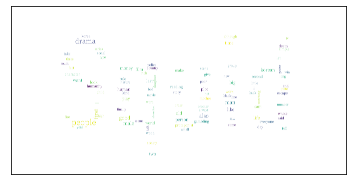

In [101]:
word_cloud = WordCloud(
    font_path=r'/Users/takasugi/Downloads/SourceHanSerifCN-VF.otf',
    background_color='white',
        # 设置背景宽
    width=600,
        # 设置背景高
    height=1000,
        # 最大字体
    max_font_size=100,
        # 最小字体
    min_font_size=10,
    scale=5,
    mask=mg,
    mode='RGBA')
word_cloud.fit_words(dic)
plt.imshow(word_cloud)
plt.xticks([])#去掉横坐标
plt.yticks([])#去掉纵坐标
plt.show()

In [102]:
word_cloud.to_file('豆瓣前一百tf_内容wc.png')

In [95]:
douban_title_tail_100=tf1.sort_values(['tf'], ascending=False).tail(100)
douban_title_tail_100.to_csv('DOUBAN_内容_tail_100.csv')